In [29]:
#Evan-1103204160
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd

# Mengganti path dengan path sesuai lokasi dataset Anda di Google Drive
path_to_dataset = '/content/drive/MyDrive/Datasets/wates 1 tahun.xlsx'

# Membaca dataset dari berkas CSV
data = pd.read_excel(path_to_dataset)

# Membuat DataFrame
df = pd.DataFrame(data)

# Sekarang Anda memiliki DataFrame yang dapat digunakan untuk menganalisis data Anda
df.head()

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Produk,Jumlah Produk,Jumlah Dibatalkan,Harga Per Produk,Subtotal,Tipe Harga,Diskon Produk,Diskon Transaksi,Pajak,Total,Status,Metode Pembayaran
0,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Sate Tegal 10 Campur, Reguler",1,0,60000,60000,Normal,0,0,0,60000,Transaksi,DEBIT
1,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Tengkleng Masak/Segar, Reguler",1,0,35000,35000,Normal,0,0,0,35000,Transaksi,DEBIT
2,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Gule/Gule Gongso/Goreng, Reguler",1,0,25000,25000,Normal,0,0,0,25000,Transaksi,DEBIT
3,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Teh Panas/Es, Reguler",2,0,5000,10000,Normal,0,0,0,10000,Transaksi,DEBIT
4,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Nasi Putih, Reguler",2,0,7000,14000,Normal,0,0,0,14000,Transaksi,DEBIT


MEMBUAT DATA MENJADI KUMPULAN TRANSAKSI HARIAN/SHIFT

In [31]:
# Konversi kolom Tanggal ke format DateTime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
# Konversi kolom Jam ke format DateTime (Hanya jam dan menit)
df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.time
# Gabungkan kolom 'Tanggal' dan 'Jam' ke dalam satu kolom DateTime
df['Tanggal'] = pd.to_datetime(df['Tanggal'].astype(str) + ' ' + df['Jam'].astype(str))
# Definisikan fungsi untuk mendapatkan shift
def get_shift(time):
    if 8 <= time.hour < 14:
        return 1
    elif 14 <= time.hour < 22:
        return 2
    else:
        return 0  # Shift 0 untuk transaksi di luar jam kerja
# Terapkan fungsi shift ke DataFrame
df['Shift'] = df['Tanggal'].apply(get_shift)
# Buat DataFrame baru dengan data transaksi setiap shift
df = df.groupby(['Tanggal', 'Shift']).agg({'No. Struk': 'nunique', 'Subtotal': 'sum'}).reset_index()

df.columns = ['Tanggal', 'Shift', 'Jumlah Transaksi', 'Subtotal']
print(df[df['Shift'] == 1])
print(df[df['Shift'] == 2])

<ipython-input-31-81841514a7fd>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])


                  Tanggal  Shift  Jumlah Transaksi  Subtotal
0     2022-01-11 10:18:12      1                 1    149000
1     2022-01-11 10:22:09      1                 1    119000
2     2022-01-11 10:26:39      1                 1     41000
3     2022-01-11 11:04:54      1                 1     31500
4     2022-01-11 11:42:04      1                 1    198000
...                   ...    ...               ...       ...
20811 2023-12-10 13:13:43      1                 1    107000
20812 2023-12-10 13:14:52      1                 1     69000
20813 2023-12-10 13:21:36      1                 1    244000
20814 2023-12-10 13:26:36      1                 1     49000
20815 2023-12-10 13:43:15      1                 1    700000

[6635 rows x 4 columns]
                  Tanggal  Shift  Jumlah Transaksi  Subtotal
11    2022-01-11 14:02:27      2                 1     49000
12    2022-01-11 14:07:12      2                 1     63000
13    2022-01-11 14:20:26      2                 1    130000

In [32]:
# Konversi kembali datetime "Tanggal" ke date
df["Tanggal"] = df["Tanggal"].dt.date

# Sum "Subtotal" berdasarkan "Tanggal" dan "Shift"
df = df.groupby(["Tanggal", "Shift"]).agg({"Subtotal": "sum", 'Jumlah Transaksi': 'sum'}).reset_index()
df.columns = ["Tanggal", "Shift", "Subtotal","Jumlah Transaksi"]

print(df[df["Shift"] == 1])
print(df[df['Shift'] == 2])
df.head()

        Tanggal  Shift  Subtotal  Jumlah Transaksi
0    2022-01-11      1   1359500                11
2    2022-01-12      1   4747250                25
4    2022-02-11      1   2994000                14
6    2022-02-12      1   5659000                31
8    2022-03-11      1   2132000                13
..          ...    ...       ...               ...
715  2023-12-06      1   1625000                10
717  2023-12-07      1   3283000                13
719  2023-12-08      1   3690000                17
721  2023-12-09      1   1691000                 9
723  2023-12-10      1   2949000                13

[362 rows x 4 columns]
        Tanggal  Shift  Subtotal  Jumlah Transaksi
1    2022-01-11      2   5832750                37
3    2022-01-12      2   4656000                33
5    2022-02-11      2   5840000                41
7    2022-02-12      2   7230000                42
9    2022-03-11      2   7492250                40
..          ...    ...       ...               ...
716  20

,Tanggal,Shift,Subtotal,Jumlah Transaksi
0,2022-01-11,1,1359500,11
1,2022-01-11,2,5832750,37
2,2022-01-12,1,4747250,25
3,2022-01-12,2,4656000,33
4,2022-02-11,1,2994000,14


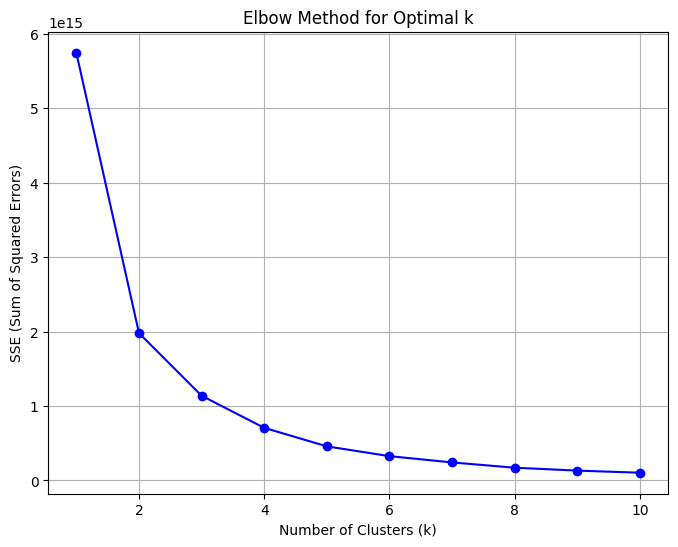

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Kolom yang akan digunakan untuk analisis klasterisasi
X = df[['Shift', 'Subtotal', 'Jumlah Transaksi']]

# Menyimpan nilai SSE (Sum of Squared Errors) untuk setiap jumlah klaster k
sse = []
for k in range(1, 11):  # Melakukan iterasi untuk k dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Menggambar grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


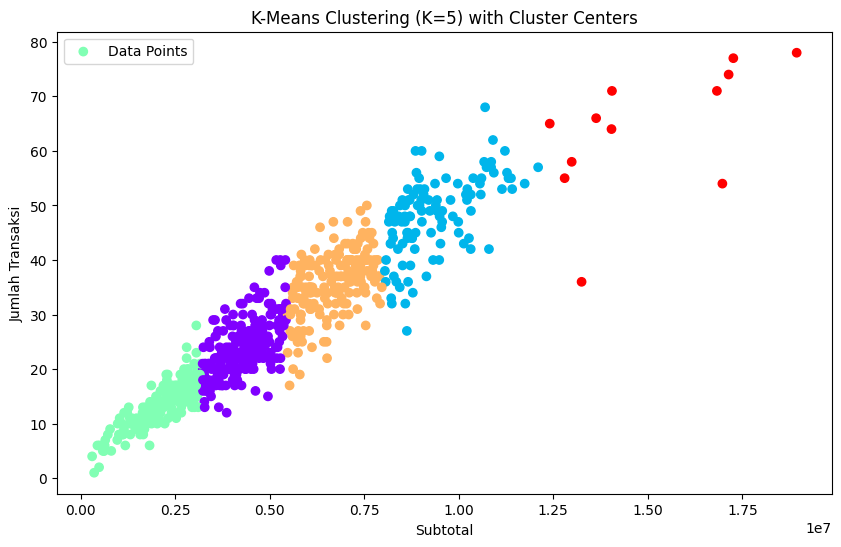

In [38]:

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[['Shift', 'Subtotal', 'Jumlah Transaksi']]

# Buat model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)

# Lakukan klasterisasi pada data
df['label'] = kmeans.fit_predict(X)

# Visualisasikan hasil klasterisasi
plt.figure(figsize=(10, 6))
plt.scatter(X['Subtotal'], X['Jumlah Transaksi'], c=df['label'], cmap='rainbow', label='Data Points')
plt.xlabel('Subtotal')
plt.ylabel('Jumlah Transaksi')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()

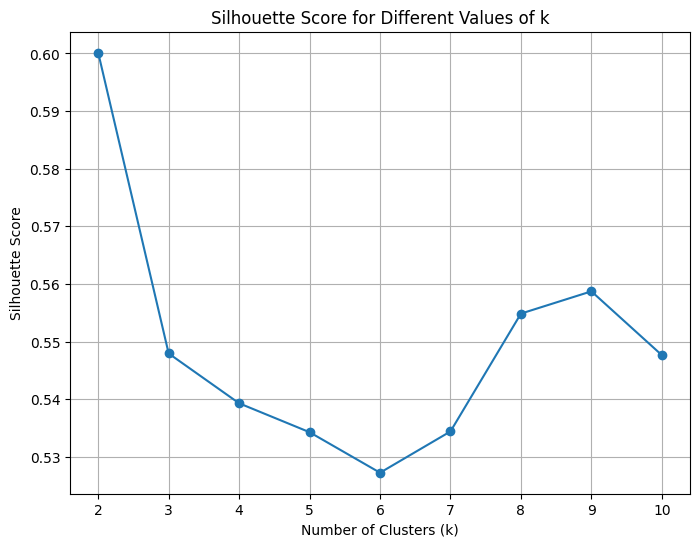

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[[ 'Subtotal', 'Jumlah Transaksi']]

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot hasil Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


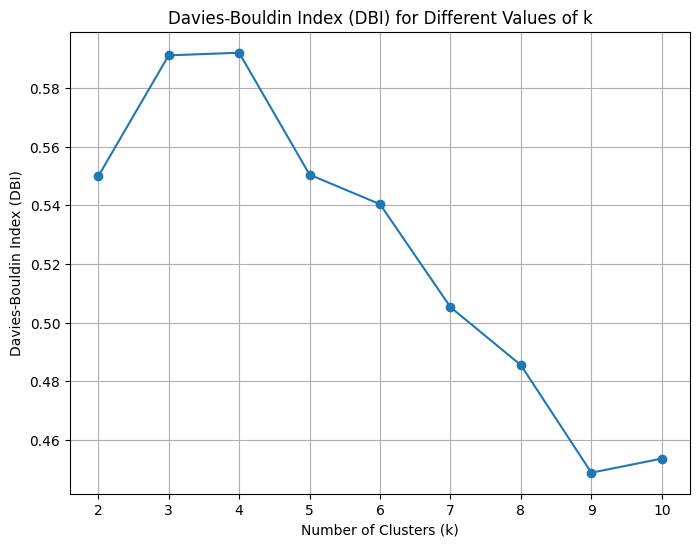

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[[ 'Subtotal', 'Jumlah Transaksi']]

# Inisialisasi list untuk menyimpan nilai DBI
dbi_scores = []

# Loop untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)

# Plot hasil DBI
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), dbi_scores, marker='o')
plt.title('Davies-Bouldin Index (DBI) for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index (DBI)')
plt.grid()
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[[ 'Subtotal', 'Jumlah Transaksi']]

# Inisialisasi list untuk menyimpan skor Silhouette dan DBI
k_values = list(range(2, 11))
silhouette_scores = []
dbi_scores = []

# Loop untuk k dari 2 hingga 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)

# Membuat DataFrame untuk menyimpan skor
scores_df = pd.DataFrame({'k': k_values, 'Silhouette Score': silhouette_scores, 'DBI': dbi_scores})

# Menampilkan DataFrame
print(scores_df)

    k  Silhouette Score       DBI
0   2          0.600124  0.549882
1   3          0.547931  0.591146
2   4          0.539283  0.592043
3   5          0.534264  0.550478
4   6          0.527232  0.540398
5   7          0.534399  0.505296
6   8          0.554850  0.485531
7   9          0.558712  0.448863
8  10          0.547640  0.453687


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import pandas as pd

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[[ 'Subtotal', 'Jumlah Transaksi']]

# Inisialisasi list untuk menyimpan nilai CHI
k_values = list(range(2, 11))
chi_scores = []

# Loop untuk k dari 2 hingga 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    chi = calinski_harabasz_score(X, labels)
    chi_scores.append(chi)

# Membuat DataFrame untuk menyimpan skor
scores_df = pd.DataFrame({'k': k_values, 'Calinski-Harabasz Index (CHI)': chi_scores})

# Menampilkan DataFrame
print(scores_df)

    k  Calinski-Harabasz Index (CHI)
0   2                    1374.871836
1   3                    1461.487993
2   4                    1713.792741
3   5                    2078.700586
4   6                    2388.130378
5   7                    2723.247101
6   8                    3340.945876
7   9                    3805.277667
8  10                    4323.672602
